# EDA Checkpoint

# Names

- Aiden Jee
- Rishmal Rohin Kumar
- Gavin Zhou

<a id='research_question'></a>
# Research Question

What biological, health, and socioeconomic factors are most indicative of diabetes or prediabetes? Do the most indicative factors vary based on Sex?

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

# Data Cleaning

First, let's take a look at the dataset.

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


We decided to focus on a specific subset of the available features for our study. We will remove the unnecessary columns from our dataframe

In [4]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [32]:
data = data[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'MentHlth', 'Sex', 'Age', 'Income']]
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,MentHlth,Sex,Age,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,18.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,11.0,4.0


Since we are going to be considering many of these factors in conjuction with one another, we want to make sure to get rid of all rows that have any empty columns. Fortunately, we found that this dataset had no rows with empty columns.

In [6]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
MentHlth                0
Sex                     0
Age                     0
Income                  0
dtype: int64

We noticed that a lot of the column names are unclear and confusing, so we decided to rename many of the columns

In [33]:
data = data.rename(columns = {"Diabetes_binary": "Diabetes", "HighBP": "High Blood Pressure", "HighChol" : "High Cholesterol", "CholCheck": "Cholesterol Check", "Smoker": "Smoking History", "HeartDiseaseorAttack": "Heart Disease or Attack", "PhysActivity": "Physical Activity", "HvyAlcoholConsump": "Heavy Alcohol Consumption", "MentHlth": "Mental Health"})
data.head()

,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Check,BMI,Smoking History,Stroke,Heart Disease or Attack,Physical Activity,Heavy Alcohol Consumption,Mental Health,Sex,Age,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,18.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,11.0,4.0


We replaced the values in the Boolean columns with the actual Boolean values

In [35]:
data["Diabetes"] = data["Diabetes"].replace((0.0, 1.0), (False, True))
data["High Blood Pressure"] = data["High Blood Pressure"].replace((0.0, 1.0), (False, True))
data["High Cholesterol"] = data["High Cholesterol"].replace((0.0, 1.0), (False, True))
data["Cholesterol Check"] = data["Cholesterol Check"].replace((0.0, 1.0), (False, True))
data["Smoking History"] = data["Smoking History"].replace((0.0, 1.0), (False, True))
data["Stroke"] = data["Stroke"].replace((0.0, 1.0), (False, True))
data["Heart Disease or Attack"] = data["Heart Disease or Attack"].replace((0.0, 1.0), (False, True))
data["Physical Activity"] = data["Physical Activity"].replace((0.0, 1.0), (False, True))
data["Heavy Alcohol Consumption"] = data["Heavy Alcohol Consumption"].replace((0.0, 1.0), (False, True))
data["Heavy Alcohol Consumption"] = data["Heavy Alcohol Consumption"].replace((0.0, 1.0), (False, True))
data["Sex"] = data["Sex"].replace((0.0, 1.0), ("Female", "Male"))

Lastly, let's take a look at all the values and there counts for each of the columns of the dataframe in order to check if there is anything out of the ordinary that might signify an issue

In [ ]:
data['Diabetes'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes, dtype: int64

In [ ]:
data['High Blood Pressure'].value_counts()

0.0    144851
1.0    108829
Name: High Blood Pressure, dtype: int64

In [ ]:
data['High Cholesterol'].value_counts()

0.0    146089
1.0    107591
Name: High Cholesterol, dtype: int64

In [ ]:
data['Cholesterol Check'].value_counts()

1.0    244210
0.0      9470
Name: Cholesterol Check, dtype: int64

In [ ]:
data['BMI'].value_counts()

27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

In [ ]:
data['Smoking History'].value_counts()

0.0    141257
1.0    112423
Name: Smoking History, dtype: int64

In [ ]:
data['Stroke'].value_counts()

0.0    243388
1.0     10292
Name: Stroke, dtype: int64

In [ ]:
data['Heart Disease or Attack'].value_counts()

0.0    229787
1.0     23893
Name: Heart Disease or Attack, dtype: int64

In [ ]:
data['Physical Activity'].value_counts()

1.0    191920
0.0     61760
Name: Physical Activity, dtype: int64

In [ ]:
data['Heavy Alcohol Consumption'].value_counts()

0.0    239424
1.0     14256
Name: Heavy Alcohol Consumption, dtype: int64

In [ ]:
data['Mental Health'].value_counts()

0.0     175680
2.0      13054
30.0     12088
5.0       9030
1.0       8538
3.0       7381
10.0      6373
15.0      5505
4.0       3789
20.0      3364
7.0       3100
25.0      1188
14.0      1167
6.0        988
8.0        639
12.0       398
28.0       327
21.0       227
29.0       158
18.0        97
9.0         91
16.0        88
27.0        79
22.0        63
17.0        54
26.0        45
11.0        41
13.0        41
23.0        38
24.0        33
19.0        16
Name: Mental Health, dtype: int64

In [ ]:
data['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [ ]:
data['Age'].value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [ ]:
data['Income'].value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

# Data Analysis & Results (EDA)

In [8]:
data.describe()

,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Check,BMI,Smoking History,Stroke,Heart Disease or Attack,Physical Activity,Heavy Alcohol Consumption,Mental Health,Sex,Age,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.056197,3.184772,0.440342,8.032119,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.230302,7.412847,0.496429,3.054220,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,10.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,13.000000,8.000000


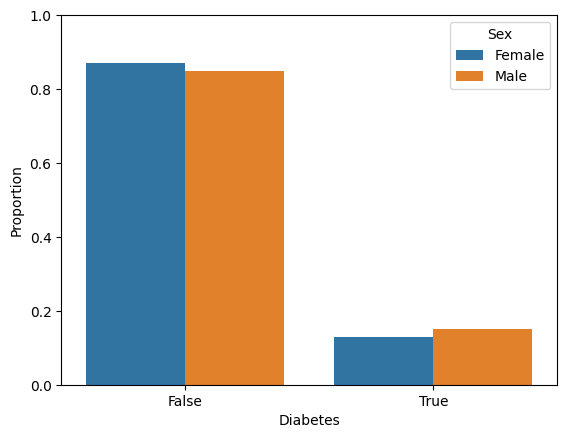

In [ ]:
sex_df = data.groupby("Sex")["Diabetes"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Diabetes", y = "Proportion", hue = "Sex", data = sex_df)
plt.ylim(0.0, 1.0)
plt.show()

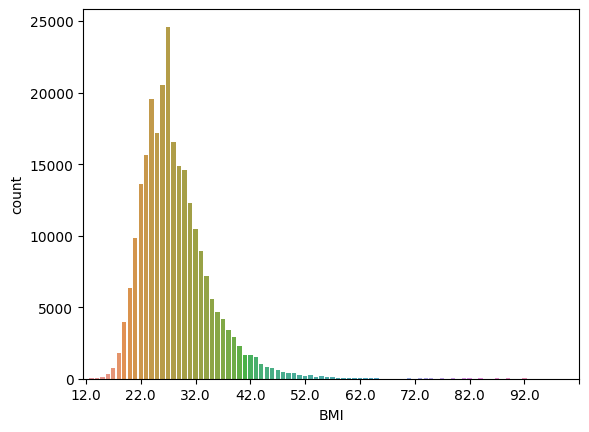

In [20]:
sns.countplot(x = "BMI", data = data)
plt.xticks(np.arange(0, 100, 10))
plt.show()

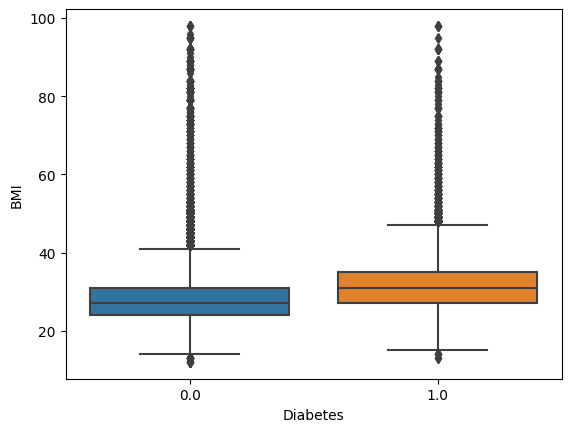

In [21]:
sns.boxplot(x = "Diabetes", y = "BMI", data = data)
plt.show()

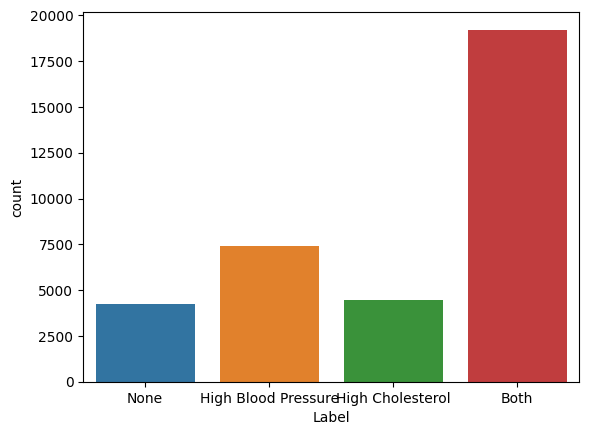

In [91]:
bp_chol = data[data["Diabetes"] == True]
bp_chol = bp_chol[["High Blood Pressure", "High Cholesterol"]]

bp_chol["Label"] = "None"
bp_chol.loc[(bp_chol["High Blood Pressure"] == True) & (bp_chol["High Cholesterol"] == False), "Label"] = "High Blood Pressure"
bp_chol.loc[(bp_chol["High Blood Pressure"] == False) & (bp_chol["High Cholesterol"] == True), "Label"] = "High Cholesterol"
bp_chol.loc[(bp_chol["High Blood Pressure"] == True) & (bp_chol["High Cholesterol"] == True), "Label"] = "Both"

sns.countplot(x = "Label", data = bp_chol, order = ["None", "High Blood Pressure", "High Cholesterol", "Both"])
plt.show()

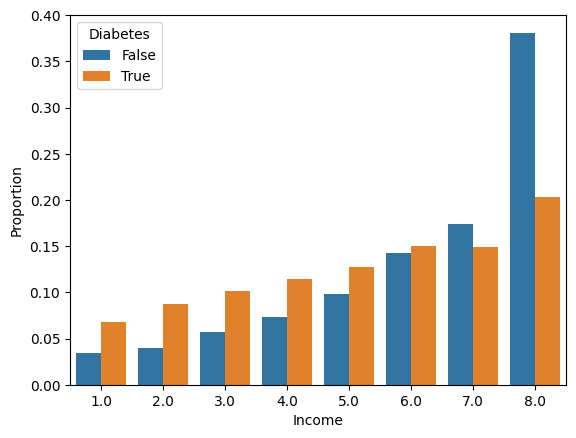

In [107]:
income_df = data.groupby("Diabetes")["Income"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Income", y = "Proportion", hue = "Diabetes", data = income_df)
plt.show()

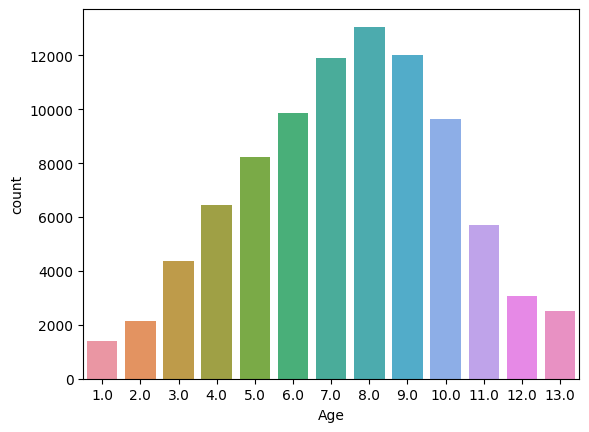

In [112]:
income8 = data[data["Income"] == 8]
sns.countplot(x = "Age", data = income8)
plt.show()

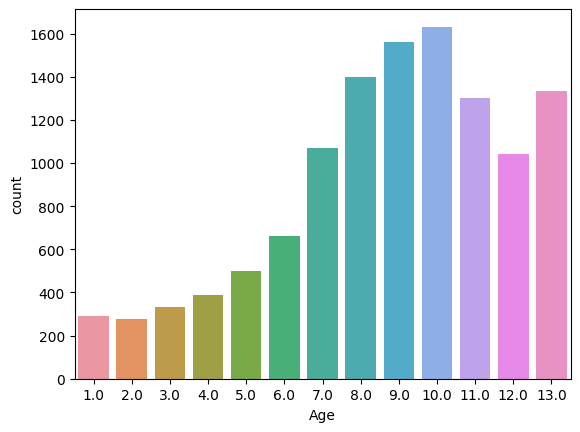

In [113]:
income2 = data[data["Income"] == 2]
sns.countplot(x = "Age", data = income2)
plt.show()

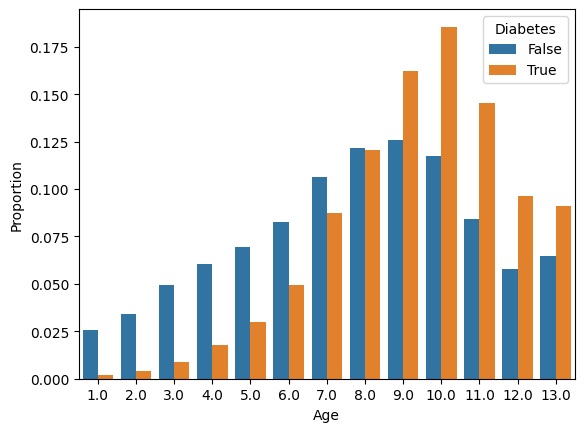

In [114]:
age_df = data.groupby("Diabetes")["Age"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Age", y = "Proportion", hue = "Diabetes", data = age_df)
plt.show()

C:\Users\rishm\AppData\Local\Temp\ipykernel_4400\1808650625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Label"] = "Unhealthy"


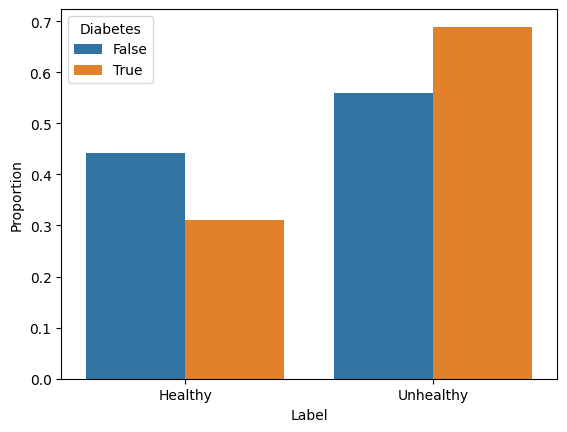

In [158]:
temp = data[["Diabetes", "Smoking History", "Physical Activity", "Heavy Alcohol Consumption"]]

temp["Label"] = "Unhealthy"
temp.loc[(temp["Smoking History"] == False) & (temp["Physical Activity"] == True) & (temp["Heavy Alcohol Consumption"] == False), "Label"] = "Healthy"

temp = temp.groupby("Diabetes")["Label"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Label", y = "Proportion", data = temp, hue = "Diabetes", order = ["Healthy", "Unhealthy"])
plt.show()

C:\Users\rishm\AppData\Local\Temp\ipykernel_4400\2087905622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifestyle["Label"] = "3 / 3"


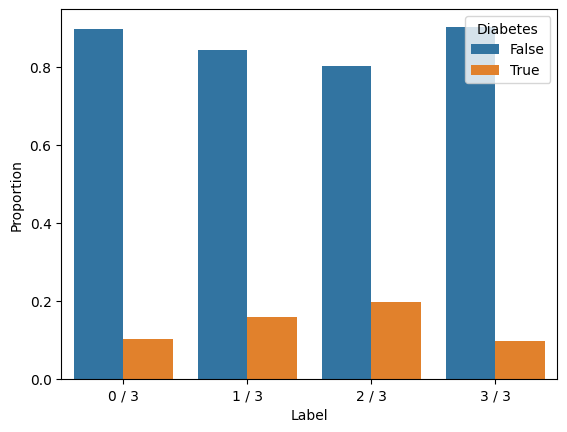

In [162]:
lifestyle = data[["Diabetes", "Smoking History", "Physical Activity", "Heavy Alcohol Consumption"]]

lifestyle["Label"] = "3 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "0 / 3"

lifestyle.loc[(lifestyle["Smoking History"] == True) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "1 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == False) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "1 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == True), "Label"] = "1 / 3"

lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == False) & (lifestyle["Heavy Alcohol Consumption"] == True), "Label"] = "2 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == True) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == True), "Label"] = "2 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == True) & (lifestyle["Physical Activity"] == False) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "2 / 3"

lifestyle = lifestyle.groupby("Label")["Diabetes"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Label", y = "Proportion", hue = "Diabetes", data = lifestyle)
plt.show()